In [148]:
%reload_ext autoreload
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import metrics

from multiprocessing import Pool
from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
%matplotlib inline


# import own scripts
import sys
sys.path.insert(0, '/src/')

%autoreload 2
from utils import clean_gdp, gdp_change, aggregate_sentiment, Model

## Incorporate Sentiment Analysis
---

In [ ]:
# load data
sentiment = pd.read_csv('src/results/sentiment.csv')
gdp = gdp_change(clean_gdp(pd.read_csv('data/GDPC1.csv')))

In [177]:
# merge aggregated sentiment 
df = aggregate_sentiment(gdp, sentiment).set_index(gdp.iloc[1:].index).fillna(0)

In [178]:
# add labels
df['label'] = list(gdp['%Change']>gdp['%Change'].mean())[1:]


Model Report
Accuracy : 0.5544
AUC Score (Train): 0.621340
CV Score : Mean - 0.5047254 | Std - 0.02984683 | Min - 0.4655172 | Max - 0.5581098


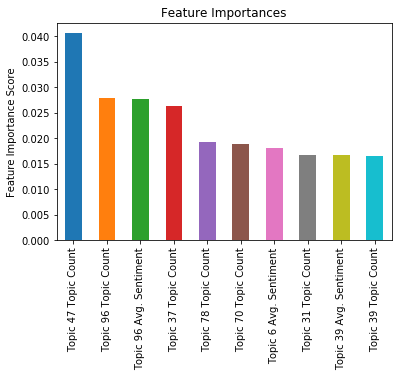

In [195]:
# model
mod = Model()
predictors = list(df.columns)[:-1]
target = 'label'
mod = mod.modelfit(RandomForestClassifier(n_estimators=1000, 
                                          n_jobs=-1, 
                                          max_depth = 2), 
                   df, 
                   predictors, 
                   target, 
                   performCV=True, 
                   printFeatureImportance=True, 
                   cv_folds=5)

In [160]:
# load
topic_words = pd.read_csv('src/results/top_words_in_topic_NMF.csv').reset_index(drop=True)

In [196]:
topic_words.iloc[[47, 96, 37]]

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
47,47,job,worker,labor,work,wage,employ,employe,000,union,...,pay,hire,economi,busi,minimum,unemploy,manufactur,econom,industri,american
96,96,trade,deal,agreement,free,export,negoti,canada,market,econom,...,partnership,manufactur,mexico,import,economi,would,deficit,currenc,polici,commerc
37,37,china,chines,chinaâ,beij,sea,south,island,philippin,hong,...,militari,asia,region,global,intern,japan,unit,countri,econom,state
